# MOVIE RECOMMENDATION SYSTEM.

- From Movies Data I will build a recommendation system based on the ratings of the movies.

https://grouplens.org/datasets/movielens/100k

# Load the Dataset


In [142]:
# Import relevant libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [143]:
# load the various datsets that help in coming up with a recommendation system.

Ratings = pd.read_csv('ml-latest-small/ratings.csv', sep=',',  usecols=['userId', 'movieId', 'rating', 'timestamp'])
Movies = pd.read_csv('ml-latest-small/movies.csv', sep=',',  usecols=['movieId', 'title', 'genres'])
Tags = pd.read_csv('ml-latest-small/tags.csv', sep=',', usecols=['userId', 'movieId', 'tag', 'timestamp'])


In [86]:
Ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [87]:
Movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [144]:
Tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [156]:
# merge Movies  and Ratings

Merged_data = pd.merge(Ratings, Movies, on='movieId')
Merged_dataTags = pd.merge(Merged_data, Tags, on=['userId', 'movieId'], how='left')
print(Merged_data.head())
print(Merged_dataTags.head())

   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  
   userId  movieId  rating  timestamp_x                        title  \
0       1        1     4.0    964982703             Toy Story (1995)   
1       1        3     4.0    964981247      Grumpier Old Men (1995)   
2       1        6     4.0    964982224                  Heat (1995) 

# Data Exploration.

- Check the Best & Worst perfoming Movie Genres, their specific Titles and Rating, this will give good incite for the Recommendation system.

In [157]:
Merged_data.groupby(['genres','title'])['rating'].mean().sort_values(ascending=False)

genres                             title                                                  
Comedy|Musical                     True Stories (1986)                                        5.0
Action|Animation|Fantasy           Justice League: Doom (2012)                                5.0
Documentary                        Connections (1978)                                         5.0
Drama                              Umberto D. (1952)                                          5.0
Comedy|Horror                      Bloodsucking Bastards (2015)                               5.0
                                                                                             ... 
Comedy                             Bad Santa 2 (2016)                                         0.5
                                   Boudu Saved From Drowning (Boudu sauvé des eaux) (1932)    0.5
                                   Brothers Solomon, The (2007)                               0.5
Action|Adventure|Fantasy|Th

In [90]:
Merged_data.groupby(['genres', 'title'])['rating'].count().sort_values(ascending=False)


genres                       title                                   
Comedy|Drama|Romance|War     Forrest Gump (1994)                         329
Crime|Drama                  Shawshank Redemption, The (1994)            317
Comedy|Crime|Drama|Thriller  Pulp Fiction (1994)                         307
Crime|Horror|Thriller        Silence of the Lambs, The (1991)            279
Action|Sci-Fi|Thriller       Matrix, The (1999)                          278
                                                                        ... 
Comedy|Horror                Ghoulies II (1987)                            1
                             Fracchia contro Dracula (1985)                1
                             Dr. Giggles (1992)                            1
                             Deathgasm (2015)                              1
Comedy|Drama|Romance         Law of Desire (Ley del deseo, La) (1987)      1
Name: rating, Length: 9724, dtype: int64

# Top Rated Movies

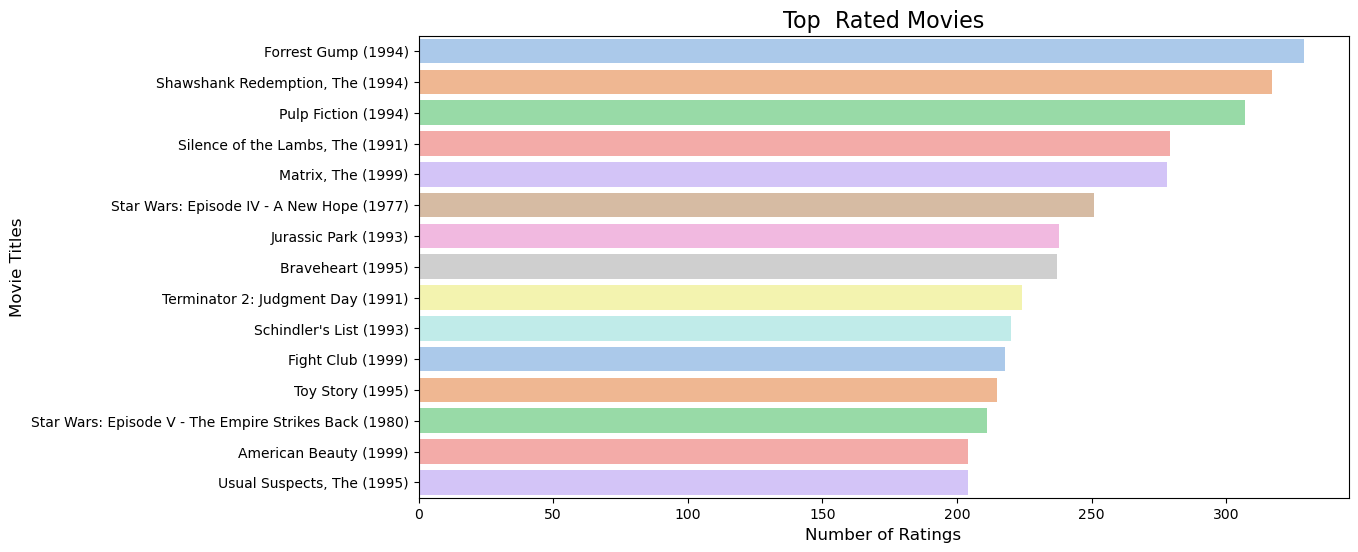

In [129]:
Top_movies = Merged_data['title'].value_counts().head(15)

# Plot the top most rated movies

plt.figure(figsize=(12, 6))
sns.barplot(x=Top_movies.values, y=Top_movies.index, palette='pastel')
plt.title('Top  Rated Movies', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Movie Titles', fontsize=12)
plt.show()

# Distribution by Genres

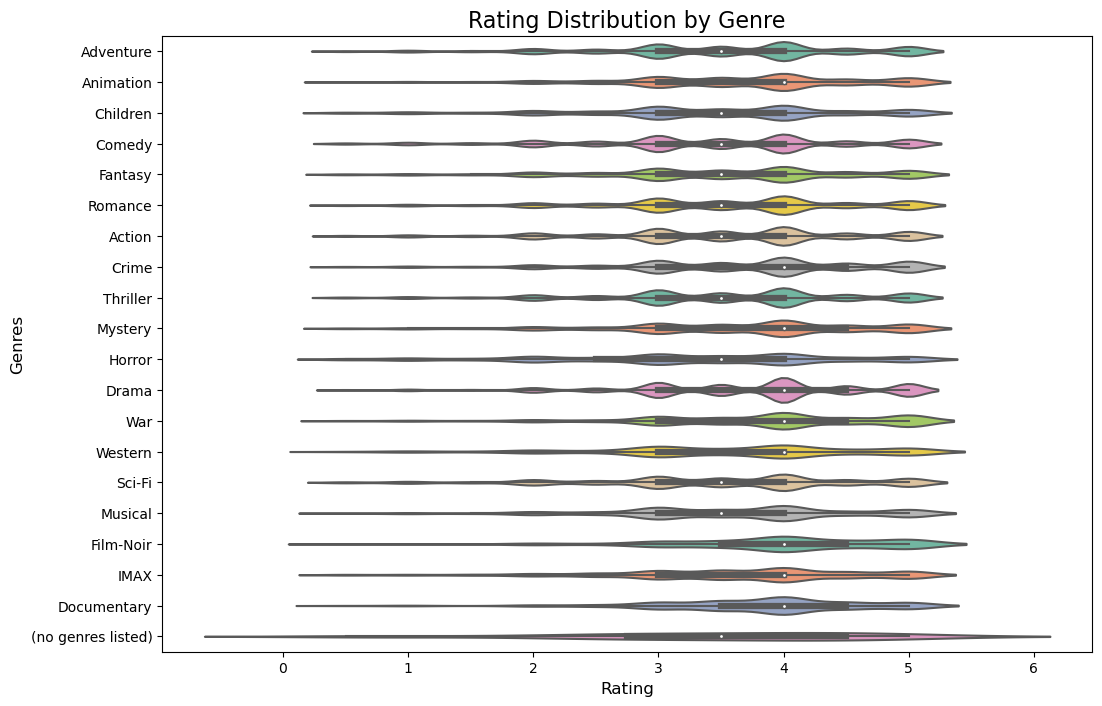

In [127]:
Genre_counts = Merged_data[['rating', 'genres']].copy()
Genre_counts['genres'] = Genre_counts['genres'].str.split('|')
Genre_counts = Genre_counts.explode('genres')

# Plot rating distribution for each genre using a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='rating', y='genres', data=Genre_counts, palette='Set2')
plt.title('Rating Distribution by Genre', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.show()

In [92]:
# Most Popular Movie and least Popular Genre according to Ratings.

Most_popular_movie = Merged_data.idxmax()
Highest_avg_rating = Most_popular_movie.max()
print(f"The most popular movie is: {Most_popular_movie[1]} with an average rating of {Highest_avg_rating}")

The most popular movie is: 51362 with an average rating of 99534


C:\Users\HP\AppData\Local\Temp\ipykernel_19192\2713535143.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The most popular movie is: {Most_popular_movie[1]} with an average rating of {Highest_avg_rating}")


In [93]:
Top_rated_movies = Merged_data[Merged_data['rating'] == 5.0][['title', 'genres']].drop_duplicates()

# Display the top-rated movies and their genres
print("Movies with a rating of 5.0:")
print(Top_rated_movies)

Movies with a rating of 5.0:
                                                    title  \
3                             Seven (a.k.a. Se7en) (1995)   
4                              Usual Suspects, The (1995)   
6                                    Bottle Rocket (1996)   
8                                          Rob Roy (1995)   
9                                   Canadian Bacon (1995)   
...                                                   ...   
100667                      Only Lovers Left Alive (2013)   
100675  Why Don't You Play In Hell? (Jigoku de naze wa...   
100722  Crippled Avengers (Can que) (Return of the 5 D...   
100779                                 Tokyo Tribe (2014)   
100811                        Everybody Wants Some (2016)   

                                genres  
3                     Mystery|Thriller  
4               Crime|Mystery|Thriller  
6       Adventure|Comedy|Crime|Romance  
8             Action|Drama|Romance|War  
9                           Comed

In [94]:
# merge tittle and genres columns to one column.

Top_rated_movies['Title_genres'] = Top_rated_movies['title'] + " (" + Top_rated_movies['genres'] + ")"

# Display the top-rated movies and their genres

print("Movies with a rating of 5.0:")
print(Top_rated_movies[['Title_genres']])

Movies with a rating of 5.0:
                                             Title_genres
3          Seven (a.k.a. Se7en) (1995) (Mystery|Thriller)
4       Usual Suspects, The (1995) (Crime|Mystery|Thri...
6       Bottle Rocket (1996) (Adventure|Comedy|Crime|R...
8               Rob Roy (1995) (Action|Drama|Romance|War)
9                      Canadian Bacon (1995) (Comedy|War)
...                                                   ...
100667  Only Lovers Left Alive (2013) (Drama|Horror|Ro...
100675  Why Don't You Play In Hell? (Jigoku de naze wa...
100722  Crippled Avengers (Can que) (Return of the 5 D...
100779     Tokyo Tribe (2014) (Action|Crime|Drama|Sci-Fi)
100811               Everybody Wants Some (2016) (Comedy)

[2954 rows x 1 columns]


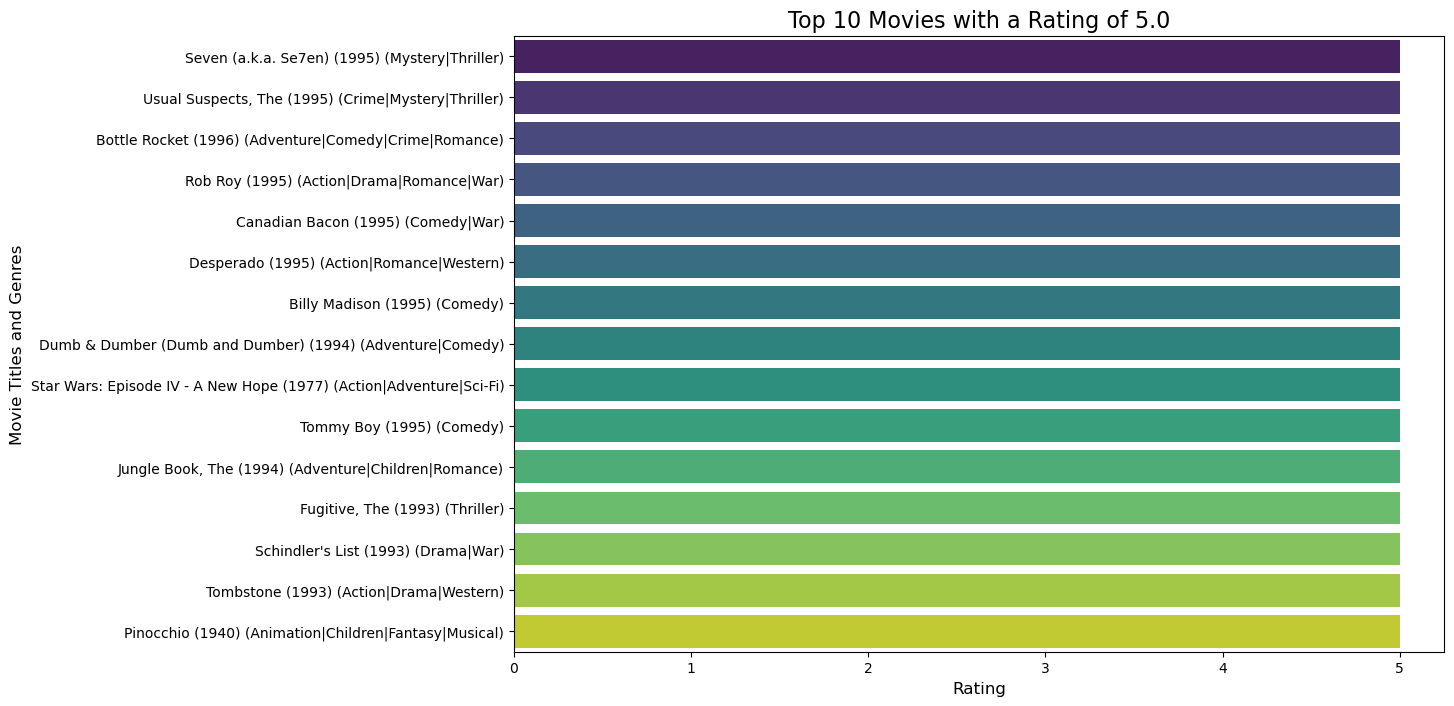

In [132]:

Top_rated_movies['Title_genres'] = Top_rated_movies['title'] + " (" + Top_rated_movies['genres'] + ")"

top_n = 15

# Sort the top-rated movies by rating
Top_rated_movies_sorted = Top_rated_movies.head(top_n)

# Plot the sorted top-rated movies with their genres
plt.figure(figsize=(12, 8))
sns.barplot(y=Top_rated_movies_sorted['Title_genres'], x=[5] * len(Top_rated_movies_sorted), palette='viridis')
plt.title('Top 10 Movies with a Rating of 5.0', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Movie Titles and Genres', fontsize=12)
plt.show()

# Dealing with Null values.

In [98]:
# Check for nulls.

Nulls = Merged_data.isnull().sum()
print("Null values in each column:\n", Nulls)

Null values in each column:
 userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


In [159]:
# Impute Nulls

from sklearn.impute import SimpleImputer

Numeric_columns = Merged_dataTags.select_dtypes(include=['number']).columns

Numeric_imputer = SimpleImputer(strategy='mean')
Merged_dataTags[Numeric_columns] = Numeric_imputer.fit_transform(Merged_dataTags[Numeric_columns])

print("Numeric columns after imputation:")
print(Merged_dataTags[Numeric_columns].head())


Numeric columns after imputation:
   userId  movieId  rating  timestamp_x     tag   timestamp_y
0     1.0      1.0     4.0  964982703.0  1151.0  1.323525e+09
1     1.0      3.0     4.0  964981247.0  1151.0  1.323525e+09
2     1.0      6.0     4.0  964982224.0  1151.0  1.323525e+09
3     1.0     47.0     5.0  964983815.0  1151.0  1.323525e+09
4     1.0     50.0     5.0  964982931.0  1151.0  1.323525e+09


In [152]:
# Impute Categoticals for Genres 'no genre listed'

from sklearn.impute import SimpleImputer

Merged_copy = Top_rated_movies.copy()

# Define a placeholder for missing genres
placeholder = 'Not listed'

# Impute missing genres with 'Not listed'
Genre_imputer = SimpleImputer(strategy='constant', fill_value=placeholder)
Merged_copy['genres'] = Genre_imputer.fit_transform(Merged_copy[['genres']]).ravel()

# Check if there are any missing values left
print(Merged_copy['genres'].isnull().sum())

# Display the first few rows to confirm the changes
print(Merged_copy.head())

0
                         title                          genres  \
3  Seven (a.k.a. Se7en) (1995)                Mystery|Thriller   
4   Usual Suspects, The (1995)          Crime|Mystery|Thriller   
6         Bottle Rocket (1996)  Adventure|Comedy|Crime|Romance   
8               Rob Roy (1995)        Action|Drama|Romance|War   
9        Canadian Bacon (1995)                      Comedy|War   

                                        Title_genres  
3     Seven (a.k.a. Se7en) (1995) (Mystery|Thriller)  
4  Usual Suspects, The (1995) (Crime|Mystery|Thri...  
6  Bottle Rocket (1996) (Adventure|Comedy|Crime|R...  
8          Rob Roy (1995) (Action|Drama|Romance|War)  
9                 Canadian Bacon (1995) (Comedy|War)  


In [140]:
print(Merged_copy['genres'].isnull().sum())

0


In [141]:
print(Top_rated_movies['genres'].isnull().sum())

0


- N.B :  It is important to notice that our DATA is perfectly goood and has Zero Null Values.

# Correlation Matrix - Tags, Ratings & Users

In [158]:
# Encode the Tags column in the Data.

from sklearn.preprocessing import LabelEncoder

Label_encoder = LabelEncoder()
Merged_dataTags['tag'] = Label_encoder.fit_transform(Merged_dataTags['tag'].astype(str))

          rating       tag    userId
rating  1.000000 -0.050546 -0.039520
tag    -0.050546  1.000000 -0.047949
userId -0.039520 -0.047949  1.000000


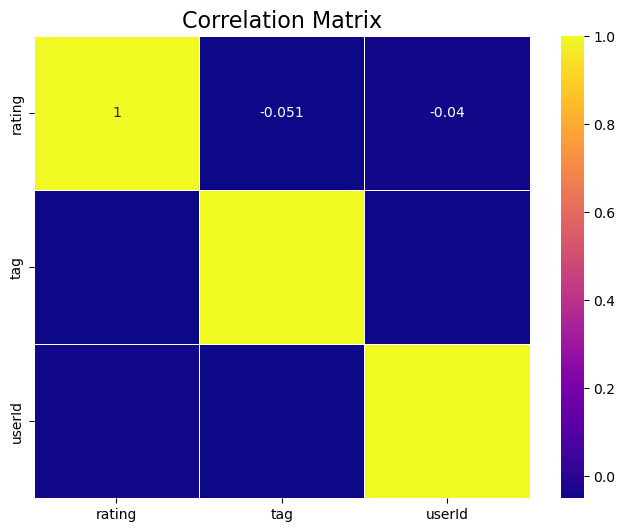

In [163]:
# Correlation Matrix

Num_cols = ['rating', 'tag', 'userId']
correlation_matrix = Merged_dataTags[Num_cols].corr()
print(correlation_matrix)

fig, ax = plt.subplots(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', linewidths=0.5, ax=ax)

# Set the title
ax.set_title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()

- Results from Correlation Matrix show that target features chosen do not have a high Correlation towards each other.

# Prepare Data for Collaborative Filtering

- Methods:

  1. K-Nearest Neighbors
  2. Singular Value Decomposition

In [212]:
# Create the Utility Matrix.

Utility_matrix = Merged_data.pivot(index='userId', columns='movieId', values='rating')
print(Utility_matrix.head())

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     N

The Result has very many Null values that we neeed to handle, Considering the method of Filtering you are about t use that will determine how we handle the Null Values.

 For:

- KNN filtering fill NaN values with *Zeros 0*
- SVD filtering fill NaN values with *User's averaage rating*

In [213]:
# Basic KNN
# Fill NaN values with 0

from sklearn.neighbors import NearestNeighbors


Utility_KNN = Utility_matrix.fillna(0, inplace=True)
Utility_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:

# Fit the Model

KNN = NearestNeighbors(metric='cosine', algorithm='brute')
KNN.fit(Utility_matrix.values)


NearestNeighbors(algorithm='brute', metric='cosine')

In [201]:
#KNN Mean Subtraction

Mean_ratings = Utility_matrix.mean(axis=1)
Utility_centered = Utility_matrix.sub(Mean_ratings, axis=0).fillna(0)

KNN_mean_sub = NearestNeighbors(metric='cosine', algorithm='brute')
KNN_mean_sub.fit(Utility_centered.values)
print(Utility_centered)

movieId    1         2         3         4         5         6         7       \
userId                                                                          
1        3.895825 -0.104175  3.895825 -0.104175 -0.104175  3.895825 -0.104175   
2       -0.011775 -0.011775 -0.011775 -0.011775 -0.011775 -0.011775 -0.011775   
3       -0.009770 -0.009770 -0.009770 -0.009770 -0.009770 -0.009770 -0.009770   
4       -0.078980 -0.078980 -0.078980 -0.078980 -0.078980 -0.078980 -0.078980   
5        3.983546 -0.016454 -0.016454 -0.016454 -0.016454 -0.016454 -0.016454   
...           ...       ...       ...       ...       ...       ...       ...   
606      2.080625 -0.419375 -0.419375 -0.419375 -0.419375 -0.419375  2.080625   
607      3.927190 -0.072810 -0.072810 -0.072810 -0.072810 -0.072810 -0.072810   
608      2.232158  1.732158  1.732158 -0.267842 -0.267842 -0.267842 -0.267842   
609      2.987557 -0.012443 -0.012443 -0.012443 -0.012443 -0.012443 -0.012443   
610      4.506119 -0.493881 

In [216]:
from surprise import KNNBaseline, KNNWithMeans, BaselineOnly, Dataset, Reader
from surprise.model_selection import cross_validate
from scipy.sparse.linalg import svds
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [226]:
# Modelling for Surprise

reader = Reader(rating_scale=(0.5, 5))

# Ensure the DataFrame has only the necessary columns
surprise_df = Utility_centered[['userId', 'movieId', 'rating']]

# Load the data into Surprise's Dataset object
data = Dataset.load_from_df(surprise_df[['userId', 'movieId', 'rating']], reader)

# Print a sample of the data to verify
print(next(data.raw_ratings))

KeyError: "None of [Index(['userId', 'movieId', 'rating'], dtype='object', name='movieId')] are in the [columns]"

In [ ]:

KNN_baseline = KNNBaseline(sim_options={'name': 'cosine', 'user_based': True})
KNN_baseline_results = cross_validate(KNN_baseline, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("\nKNN Baseline Results")
print(f"Average RMSE: {knn_baseline_results['test_rmse'].mean()}")
print(f"Average MAE: {knn_baseline_results['test_mae'].mean()}")